# The Lego Collector's Dilemma  

## Problem statement

You are a die hard Lego enthusiast wishing to collect as many board sets as you can. But before that you wish to be able to predict the price of a new lego product before its price is revealed so that you can budget it from your revenue. Since (luckily!), you are a data scientist in the making, you wished to solve this problem yourself. This dataset contains information on lego sets scraped from lego.com. Each observation is a different lego set with various features like how many pieces in the set, rating for the set, number of reviews per set etc. Your aim is to build a linear regression model to predict the price of a set.


## About the Dataset:
The snapshot of the data, you will be working on :

![Dataset](../images/lego_data.PNG)

You can see that some of the features of `review_difficulty`, `theme_name` and `Country Name` in the data are textual in nature. Don't worry, we have made things simple for you with some behind-the-scenes data preprocessing.  We have also modified the feature of `age`. You will be learning about all these preprocessing techinques in a later concept. For now let us concentrate on getting those Lego sets in your hands soon. :) 

![Dataset](../images/new_le.png)


The dataset has details of 9910 lego sets with the following 10 features

|Feature|Description|
|-----|-----|
|age|Which age categories it belongs to|
|list_price|price of the set (in $)|
|num_reviews|number of reviews per set|
|piece_count| number of pieces in that lego set|
|play_star_rating|ratings|
|review_difficulty|difficulty level of the set|
|star_rating|ratings|
|theme_name|which theme it belongs|
|val_star_rating|ratings|
|country|country name|





## Why solve this project ?

After completing this project, you will have the better understanding of how to build a linear regression model. In this project, you will apply the following concepts.

 
- Train-test split
- Correlation between the features 
- Linear Regression
- MSE and $R^2$ Evaluation Metrics






## Data loading and splitting

The first step - you know the drill by now - load the dataset and see how it looks like. Additionally, split it into train and test set. 

## Instructions

* The path for the dataset file has been store in variable `path`
* Load dataset using pandas read_csv api in variable `df`
* Display first 5 columns of dataframe `df`.
* Store all the features(independent values) in  a variable called `X`
* Store the target variable (dependent value) in a variable called `y`
* Split the dataframe into `X_train,X_test,y_train,y_test` using `train_test_split()` function. Use `test_size = 0.3` and `random_state = 6 `


## Hints:

* Use `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)` to split the data.


## Test case

* df:
    - check the variable declaration
    - chaeck the shape df == (9910, 10)
    - df type == pandas.core.frame.DataFrame
    
* type(X) == pandas.core.frame.DataFrame
* type(y) == pandas.core.frame.Series
* X.shape == (9910, 9)
* y.shape == (9910,)
* variable check X_train,X_test,y_train,y_test

In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.cross_validation import train_test_split
# code starts here

# read the dataset
df = pd.read_csv("../data/lego_final.csv")

# print first five columns
print(df.head())

# store independent variable
X = df.drop('list_price',axis=1)

# store dependent variable
y = df['list_price']

# spliting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.3,random_state=6)
# code ends here


   ages  list_price  num_reviews  piece_count  play_star_rating  \
0    19       29.99            2          277               4.0   
1    19       19.99            2          168               4.0   
2    19       12.99           11           74               4.3   
3     5       99.99           23         1032               3.6   
4     5       79.99           14          744               3.2   

   review_difficulty  star_rating  theme_name  val_star_rating  country  
0                  0          4.5           0              4.0       20  
1                  2          5.0           0              4.0       20  
2                  2          4.3           0              4.1       20  
3                  0          4.6           1              4.3       20  
4                  1          4.6           1              4.1       20  


## Success Message 

Congrats !

You have successfully loaded the dataset and split it into `train` and `test` set. 

# Predictor Check!
Let's check the `scatter_plot` for different features vs target variable `list_price`. This tells us which features are highly correlated with the target variable `list_price` and help us predict it better. 
   
## Instructions:

* Create variable `cols` store all the `X_train` columns in it.
* Create subplot with `(nrows = 3 , ncols = 3)` and store it in variable's `fig ,axes`
* Create `for` loop to iterate through row.
* Create a nested `for` loop to access column.
* Create variable `col` and pass `cols[ i * 3 + j]`.
* Plot the `scatter` plot of each column vs. the `list_price`

### Things to ponder upon

- Which of these features would be a good predictor for estimating `list_price`?


## Hints :


* Use `for i in range(0,3)` to access row 
            
            `for j in range(0,3)` to access column. 

* Use axes[i,j].scatter(X_train[col],y_train) for scatter plot.


## Test Case 

* cols.shape == (7,)




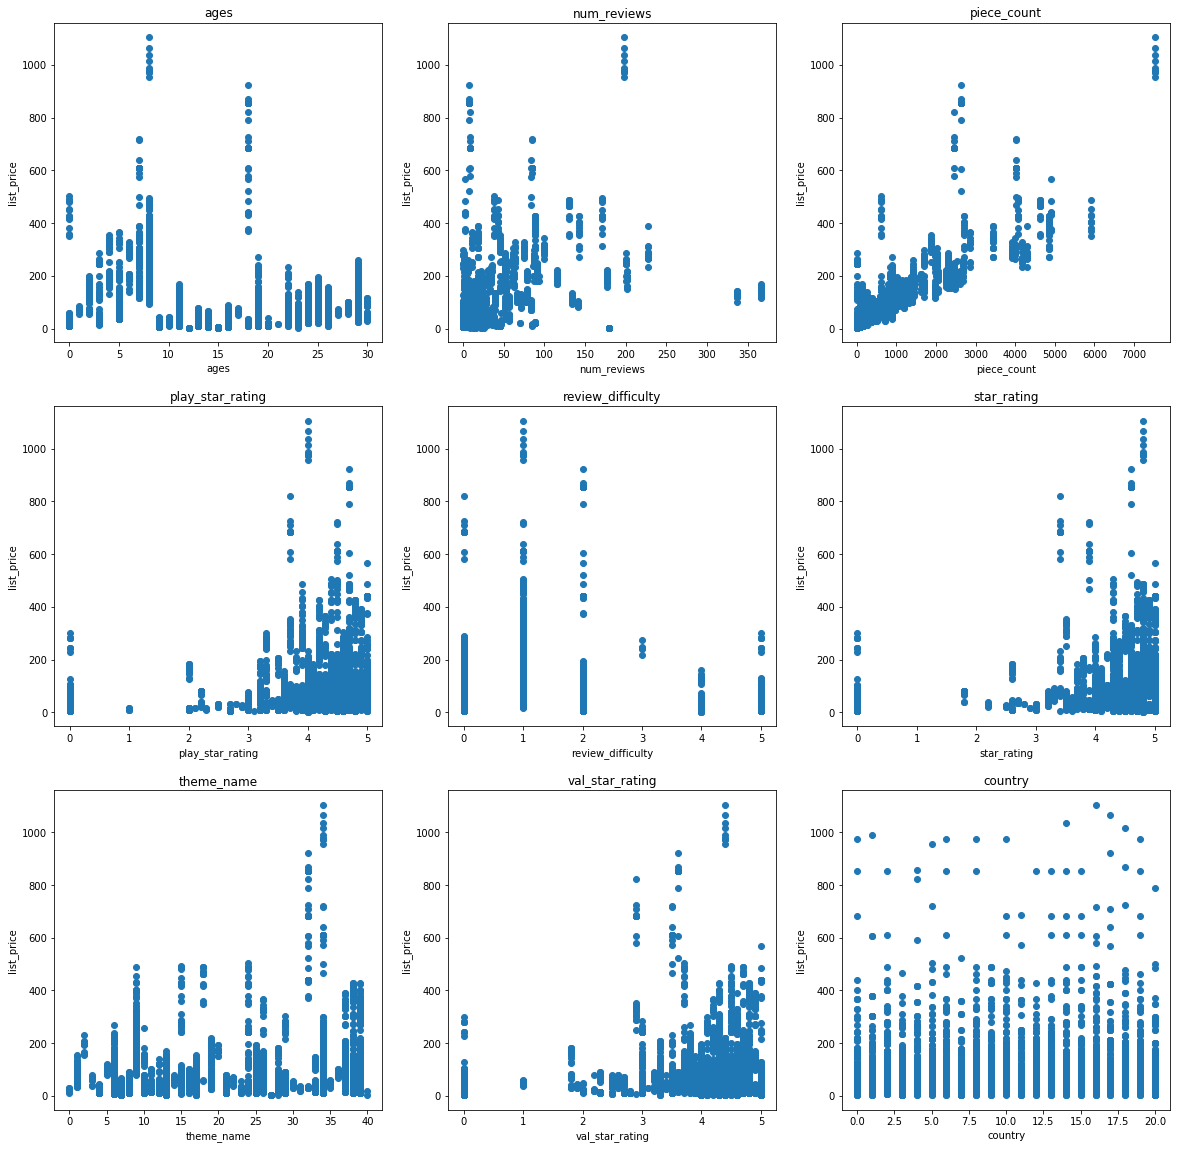

In [7]:
import matplotlib.pyplot as plt

# code starts here        
cols = X_train.columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

for i in range(0,3):
    for j in range(0,3): 
            col = cols[i*3 + j]
            axes[i,j].set_title(col)
            axes[i,j].scatter(X_train[col],y_train)
            axes[i,j].set_xlabel(col)
            axes[i,j].set_ylabel('list_price')
        

# code ends here
plt.show()

## Success Message 

Congrats !

You have successfully plotted and observed the relationship between the target and different variables through scatter plots.


# Reduce feature redundancies! 

Features highly correlated with each other adversely affect our lego pricing model. Thus we keep a inter-feature correlation threshold of `0.75`. If two features are correlated and with a value greater than `0.75`, remove one of them. 

## Instructions:

* Find the correlation between the features which are stored in `'X_train'` and store the result in a variable called `'corr'`. Print the correlation table
* Now from the above table find the features whose correlation is higher than (+/-)0.75
* We can see that the features of `play_star_rating`, `val_star_rating` and `star_ratin` have a correlation of greater than 0.75. We should drop two of these features to make our model better.
* Remove `play_star_rating` and `val_star_rating` from `X_train`.
* Remove `play_star_rating` and `val_star_rating` from `X_test`.


## Hint:
* Use `X_train.drop(['play_star_rating','val_star_rating'], 1 ,inplace=True)` to remove the column. 


## Test case :

* X_train.shape == (8582, 7)
* X_test.shape == (3679, 7)
* corr.shape == (9, 9)
* round(corr['ages']['theme_name'],2) == round(0.4761775270318478,2) 




In [8]:
# Code starts here

# corr code
corr = X_train.corr()
print(corr)
# drop columns from X_train
X_train.drop(['play_star_rating','val_star_rating'],axis = 1 ,inplace=True)

# drop columns from X_test
X_test.drop(['play_star_rating','val_star_rating'], axis = 1 ,inplace=True)

# Code ends here

                       ages  num_reviews  piece_count  play_star_rating  \
ages               1.000000    -0.160969    -0.090685          0.232847   
num_reviews       -0.160969     1.000000     0.542924          0.151801   
piece_count       -0.090685     0.542924     1.000000          0.174411   
play_star_rating   0.232847     0.151801     0.174411          1.000000   
review_difficulty -0.239683    -0.196846    -0.312239         -0.670508   
star_rating        0.102633     0.160762     0.180903          0.902573   
theme_name         0.476178     0.012342     0.173318          0.151078   
val_star_rating    0.116349     0.172431     0.192863          0.921824   
country           -0.001526     0.001953     0.002506         -0.000958   

                   review_difficulty  star_rating  theme_name  \
ages                       -0.239683     0.102633    0.476178   
num_reviews                -0.196846     0.160762    0.012342   
piece_count                -0.312239     0.180903    0

## Success Message :

Congrats!
You have successfully removed highly correlated columns with redundant features.

## Is my price prediction ok?

Now let's come to the actual task, using linear regression to predict the price. We will check the model accuracy using `r^2 score` and `mse` (If model is bad, please keep extra money for the sets!). 


## Instructions:

* Instantiate a linear regression model with `LinearRegression()` and save it to a variable called `'regressor'`.
* Fit the model on the training data `X_train and y_train`.
* Make predictions on the `X_test` features and save the results in a variable called `'y_pred'`.
* Find the `mean squared error` and store the result in a variable called 'mse'. Print the value of `mse`.
* Find the `r^2 score` and store the result in a variable called `'r2'`. Print the value of `r2`.


## Hints:

* Use `regressor.predict(X_test)` to predict the result.
* Use `r2_score(y_test,y_pred)`


## Testcase :
* check the variable `regressor`
* check the variable `y_pred`
* check the variable `mse`
* check the variable `r2`
* check the value round(mse ,2) == round(2106.7634311857664 , 2)
* check the value round(r2 , 2) == round(0.7747160273433753 , 2)
* regressor == LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
* y_pred[1] == round(26.91864921501311 , 2)



In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Code starts here

#Instantiate linear regression model
regressor=LinearRegression()

# fit the model
regressor.fit(X_train,y_train)

# predict the result
y_pred =regressor.predict(X_test)

# Calculate mse
mse = mean_squared_error(y_test, y_pred)

# print mse
print(mse)

# Calculate r2_score
r2 = r2_score(y_test, y_pred)

#print r2
print(r2)

# Code ends here

2106.763431185767
0.7747160273433752


## Success Message 

Congrats!

You have successfully applied `LinearRegression` and predicted the price of lego sets. 


# Residual check!

Based on the distance between the true target `y_test` and predicted target `y_pred`, also known as the residual the cost function is defined. Let's look at the residual and visualize the errors in the model.

## Instructions:


* Calculate the `residual` for true value vs predicted value and store the result into a new variable 'residual'.
* Plot the histogram of the `residual`.


## Hints

* Use residual = (y_test - y_pred) to calculate the residual.

## Test case :

* Check the variable `residual` 
* Check the values `round(residual[7738],2) == round(2.355480271042868 , 2)`

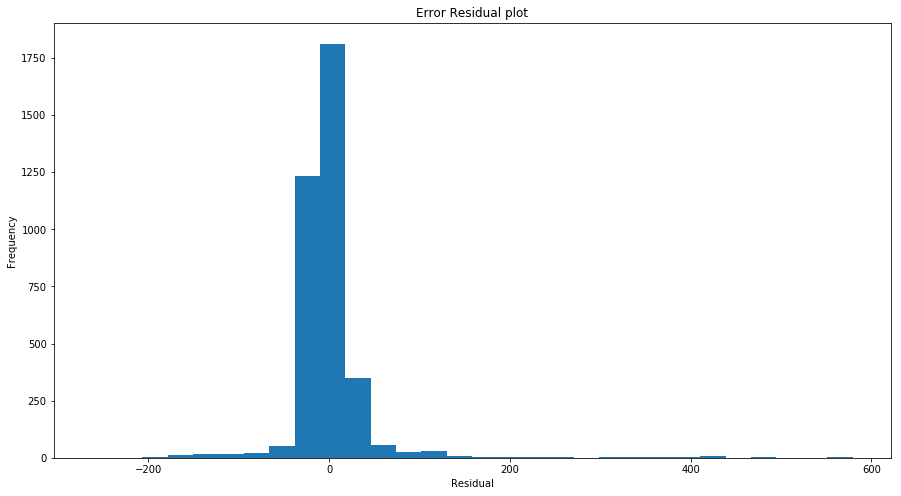

In [7]:
# Code starts here


# calculate the residual
residual = (y_test - y_pred)

# plot the figure for residual
plt.figure(figsize=(15,8))
plt.hist(residual, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")   
plt.title("Error Residual plot")
plt.show()

# Code ends here

## Success Message 

Congrats !

You have successfully calculated and visualized the `residuals`.